In [1]:
import numpy as np
import pandas as pd
df=pd.read_excel("F:/trip-fuel-consumption/measurements2.xlsx")
print(df.head())

   distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


<AxesSubplot:>

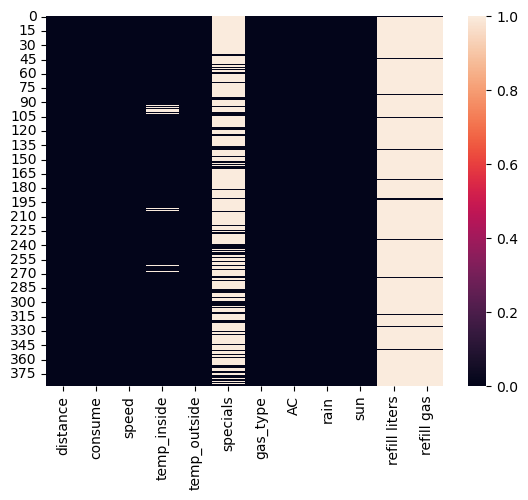

In [2]:
import seaborn as sns
sns.heatmap(df.isnull())

<AxesSubplot:>

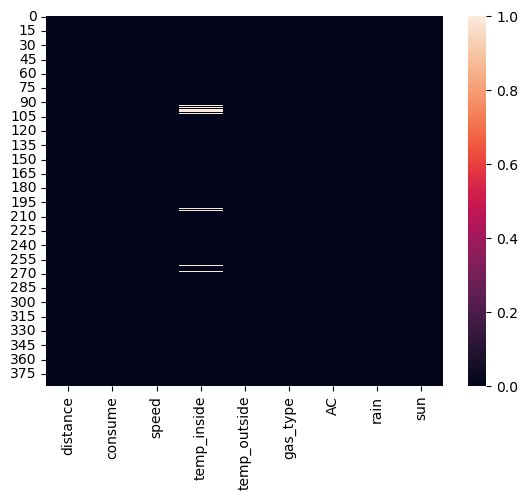

In [3]:
dropped_data=df.drop(['refill gas','refill liters','specials'],axis=1,inplace=True)
sns.heatmap(df.isnull())

In [4]:
temp_inside_mean=np.mean(df['temp_inside'])

In [5]:
print(temp_inside_mean)

21.929521276595743


In [6]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)

<AxesSubplot:>

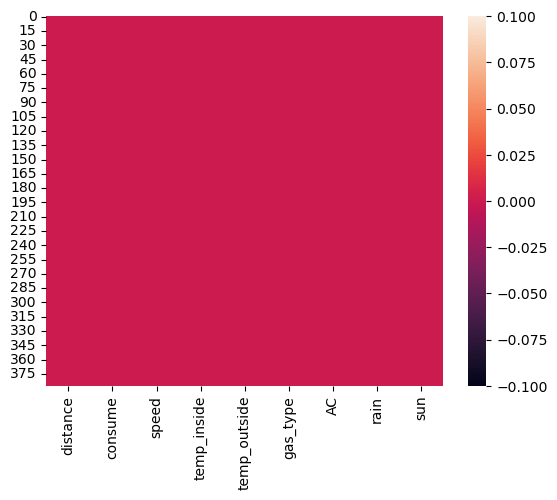

In [7]:
sns.heatmap(df.isnull())

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [9]:
x=df.drop(['consume','gas_type'],axis=1)

In [10]:
y=df['consume']

In [11]:
x.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain',
       'sun'],
      dtype='object')

In [12]:
x=x.values
y=y.values

In [13]:
dum1=pd.get_dummies(df['gas_type'])
print(dum1)

     E10  SP98
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0
..   ...   ...
383    0     1
384    0     1
385    0     1
386    0     1
387    0     1

[388 rows x 2 columns]


In [14]:
df=pd.concat([df,dum1],axis=1)

In [15]:
df.drop('gas_type',axis=1,inplace=True)

In [16]:
x1=df.drop('consume',axis=1)

In [17]:
y1=df['consume']

In [18]:
x1.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun',
       'E10', 'SP98'],
      dtype='object')

In [19]:
x1=x1.values
y1=y1.values

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
train_scaled = scaler.fit_transform(x_train)

In [24]:
test_scaled = scaler.transform(x_test)

In [25]:
lasso.fit(train_scaled,y_train)

Lasso()

In [26]:
y_pred_1=lasso.predict(train_scaled)

In [27]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_squared_error(y_train,y_pred_1))
print('Mean Squared Error:',metrics.mean_absolute_error(y_train,y_pred_1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_1)))

Mean Absolute Error: 1.1622486077259295
Mean Squared Error: 0.693468226195177
Root Mean Squared Error: 1.0780763459634617


In [29]:
y_pred_2=lasso.predict(test_scaled)

In [30]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_squared_error(y_test,y_pred_2))
print('Mean Squared Error:',metrics.mean_absolute_error(y_test,y_pred_2))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_2)))

Mean Absolute Error: 0.8392652535665295
Mean Squared Error: 0.6442489040275019
Root Mean Squared Error: 0.9161142142585331


In [31]:
x_train.shape

(271, 9)

In [32]:
x_train[0]

array([12.3, 62. , 21.5,  6. ,  0. ,  0. ,  0. ,  1. ,  0. ])

In [33]:
import joblib
joblib.dump(lasso,'model5.save')

['model5.save']